In [44]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import norm

In [45]:
#TODO: Poner pie de figuras

In [46]:
path = os.getcwd()
path_datasets = path + "/datasets/"
path_img = path + "/img/"

# Funciones

In [ ]:
def get_figures(data, nombre , rango = ['inf', 'inf'], path_save = path_img):
    media = data.mean()
    std = data.std()
    
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(2, 3)  

    ax1 = fig.add_subplot(gs[0, :])  
    hist = sns.histplot(data, kde=True, ax=ax1,stat='count',color='skyblue')
    ax1.set_ylabel('Cuenta')
    plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')  
    ax1.set_title('(a)')
        
    ax2 = fig.add_subplot(gs[1, 0])  
    sns.boxplot(data, ax=ax2, color='lightgray')
    ax2.set_title('(b)')

    data_normalizada = np.random.normal(loc=0, scale=1, size=1000000)
    ax3 = fig.add_subplot(gs[1, 1:])  
    kde = sns.kdeplot(data_normalizada, ax=ax3, color='orange')
    ax3.set_title('(c)')
    x = kde.lines[0].get_xdata()
    y = kde.lines[0].get_ydata()
    
    x_hist = hist.lines[0].get_xdata()
    y_hist = hist.lines[0].get_ydata()
    
    prob = 1
    if(rango[0] != 'inf'):
        z_i = (rango[0] - media)/std
    if(rango[1] != 'inf'):
        z_f = (rango[1] - media)/std

    color_relleno = 'orange'
    color_relleno_hist = 'grey'
    if(rango[0] == 'inf' and rango[1] == 'inf'):
        ax3.fill(x, y, color = color_relleno)
        ax1.fill(x_hist, y_hist, color = color_relleno_hist, alpha = 0.3)   
    elif(rango[0] == 'inf' and rango[1] != 'inf'): # x <= Z
        prob = norm.cdf(z_f)
        ax3.fill_between(x, y, where=(x <= z_f), color=color_relleno, alpha=0.3)
        ax1.fill_between(x_hist, y_hist, where=(x_hist <= rango[1]), color=color_relleno_hist, alpha=0.3)
    elif(rango[0] != 'inf' and rango[1] == 'inf'): # x x >=1
        prob = 1 - norm.cdf(z_i)
        ax3.fill_between(x, y, where=(x >= z_i), color=color_relleno, alpha=0.3)
        ax1.fill_between(x_hist, y_hist, where=(x_hist >= rango[0]), color=color_relleno_hist, alpha=0.3)
    else:
        prob = norm.cdf(z_f) - norm.cdf(z_i)
        ax3.fill_between(x, y, where=(x >= z_i) & (x <= z_f), color=color_relleno, alpha=0.3)
        ax1.fill_between(x_hist, y_hist, where=(x_hist >= rango[0]) & (x_hist <= rango[1]), color=color_relleno_hist, alpha=0.3)

    plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')
    plt.tight_layout()
    
    
    plt.savefig(path_save + nombre +'.jpg')
    plt.show()

# Height Wight

In [48]:
nombre = 'HeightWeight'

In [49]:
HeightWeight = pd.read_csv(path_datasets + nombre + '.csv', index_col=0)

In [50]:
# Transformar data a sistema internacional
HeightWeight['Altura(cm)'] = HeightWeight['Height(Inches)'] * 2.54
HeightWeight['Peso(kg)'] = HeightWeight['Weight(Pounds)'] * 0.453592
HeightWeight.drop('Height(Inches)', axis = 1, inplace=True)
HeightWeight.drop('Weight(Pounds)', axis = 1, inplace=True)
HeightWeight

,Altura(cm),Peso(kg)
Index,,
1,167.089607,51.252494
2,181.648633,61.909547
3,176.272800,69.411778
4,173.270164,64.562199
5,172.181037,65.452010
...,...,...
24996,176.535461,53.538008
24997,163.952580,54.518674
24998,164.334317,53.644285


## Peso Experimento 1

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


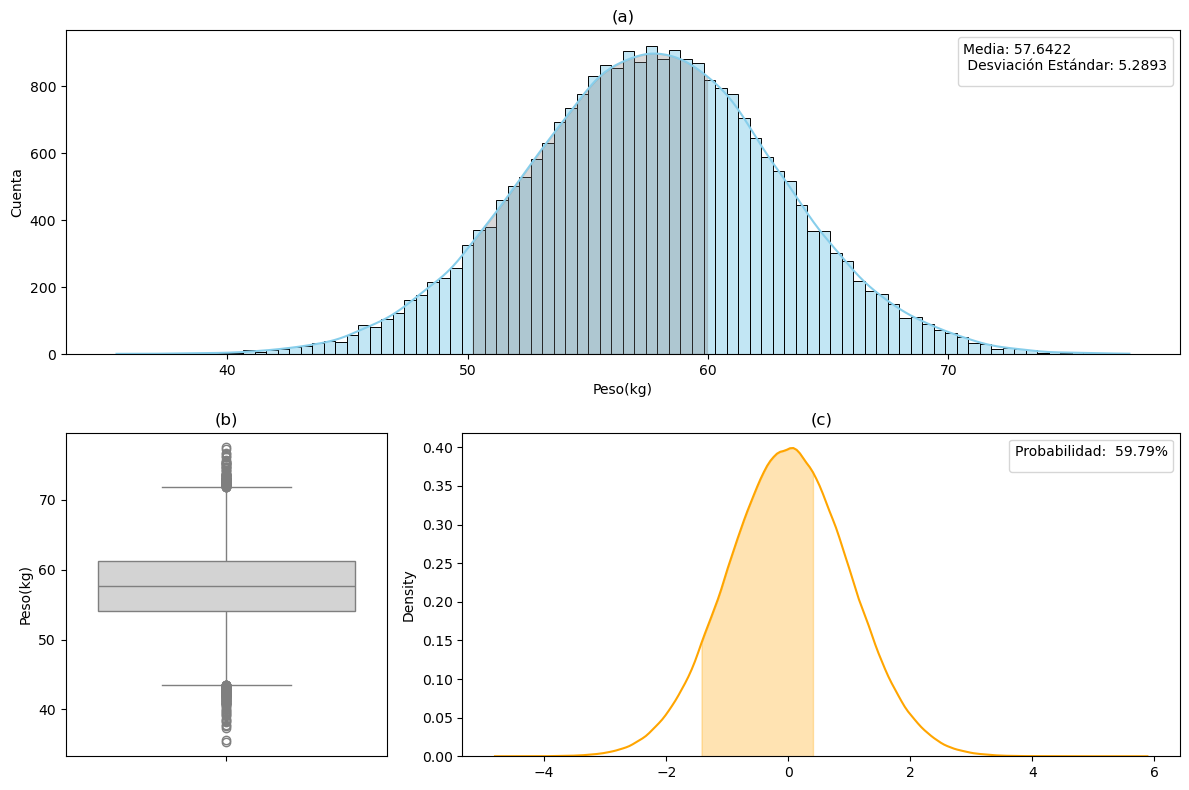

In [51]:
get_figures(HeightWeight['Peso(kg)'], nombre='1_Peso', rango = [50,60])

## Altura - experimento 2

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


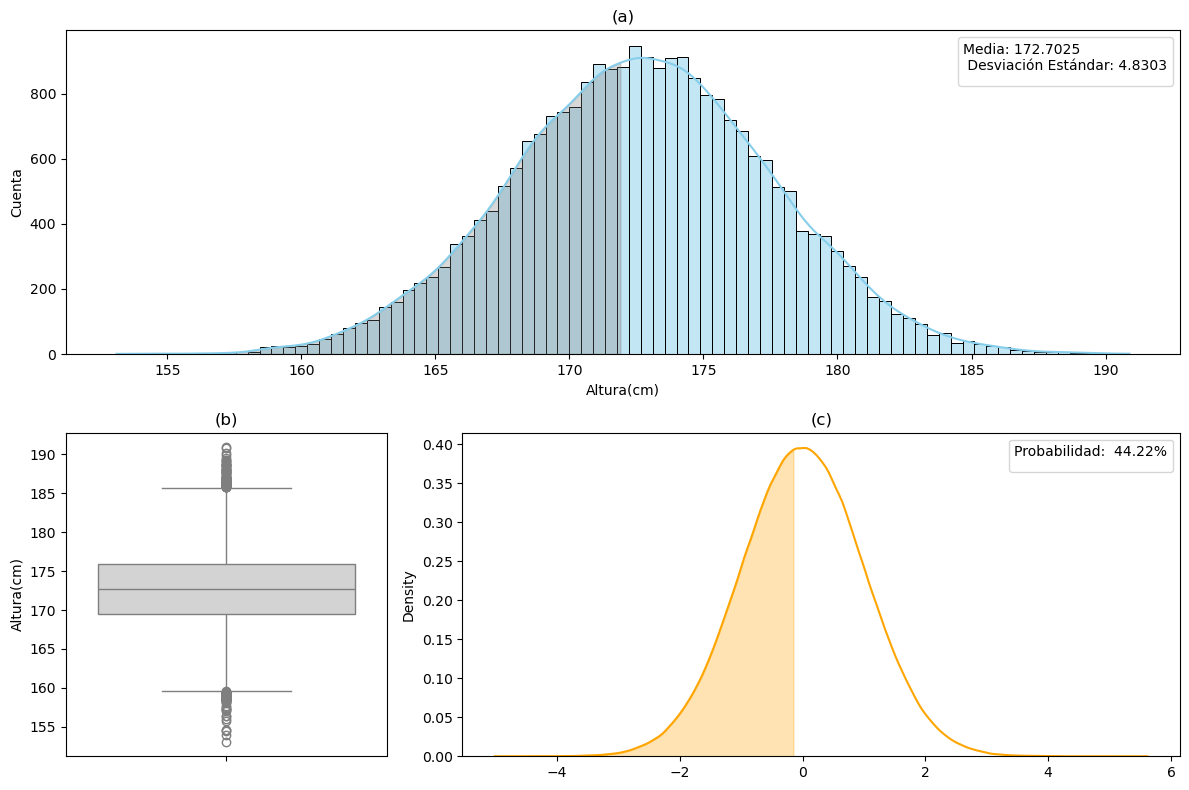

In [52]:
get_figures(HeightWeight['Altura(cm)'], nombre='2_Altura',rango=['inf', 172])

# Banana

In [53]:

nombre = 'banana_quality'
banana = pd.read_csv(path_datasets + nombre +'.csv', index_col= 0)
banana.rename(columns={'quality_score':'Calificación', 
                                'ripeness_index':'Índice de madurez',
                                'length_cm':'Largo(cm)', 
                                'weight_g':'Peso(g)', 
                                'tree_age_years':'Edad del árbol(años)', 
                                'altitude_m': 'Altitud(m)', 
                                'rainfall_mm':'Lluvia(mm)', 
                                'soil_nitrogen_ppm':'Nitrógeno en el suelo(ppm)',
                                'sugar_content_brix': 'Índice de Brix del azúcar',
                                'firmness_kgf':'Firmeza(kgf)'}, inplace = True)

banana.drop(columns=['variety', 'region', 'quality_category', 'harvest_date','ripeness_category'], inplace = True)
banana

,Calificación,Índice de madurez,Índice de Brix del azúcar,Firmeza(kgf),Largo(cm),Peso(g),Edad del árbol(años),Altitud(m),Lluvia(mm),Nitrógeno en el suelo(ppm)
sample_id,,,,,,,,,,
1,1.88,2.11,16.83,3.53,21.44,146.92,13.7,58.2,2440.5,183.6
2,2.42,4.25,16.73,4.09,26.11,160.48,5.1,280.2,2374.6,109.8
3,3.57,6.24,21.34,1.63,25.20,225.27,17.7,1246.9,1191.5,147.7
4,2.21,5.39,16.75,3.31,13.08,137.80,13.0,1150.2,2845.1,92.8
5,2.35,5.84,16.90,3.07,12.98,227.84,4.8,526.0,2136.9,129.7
...,...,...,...,...,...,...,...,...,...,...
996,3.50,4.94,21.06,2.49,27.95,196.35,12.4,409.7,2029.9,173.0
997,2.38,6.74,16.10,2.00,12.39,165.55,14.0,314.3,1330.7,180.5
998,1.68,1.41,17.17,2.28,16.56,210.08,18.4,683.0,2955.4,189.9


## Calificacion de la banana - experimento 3

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


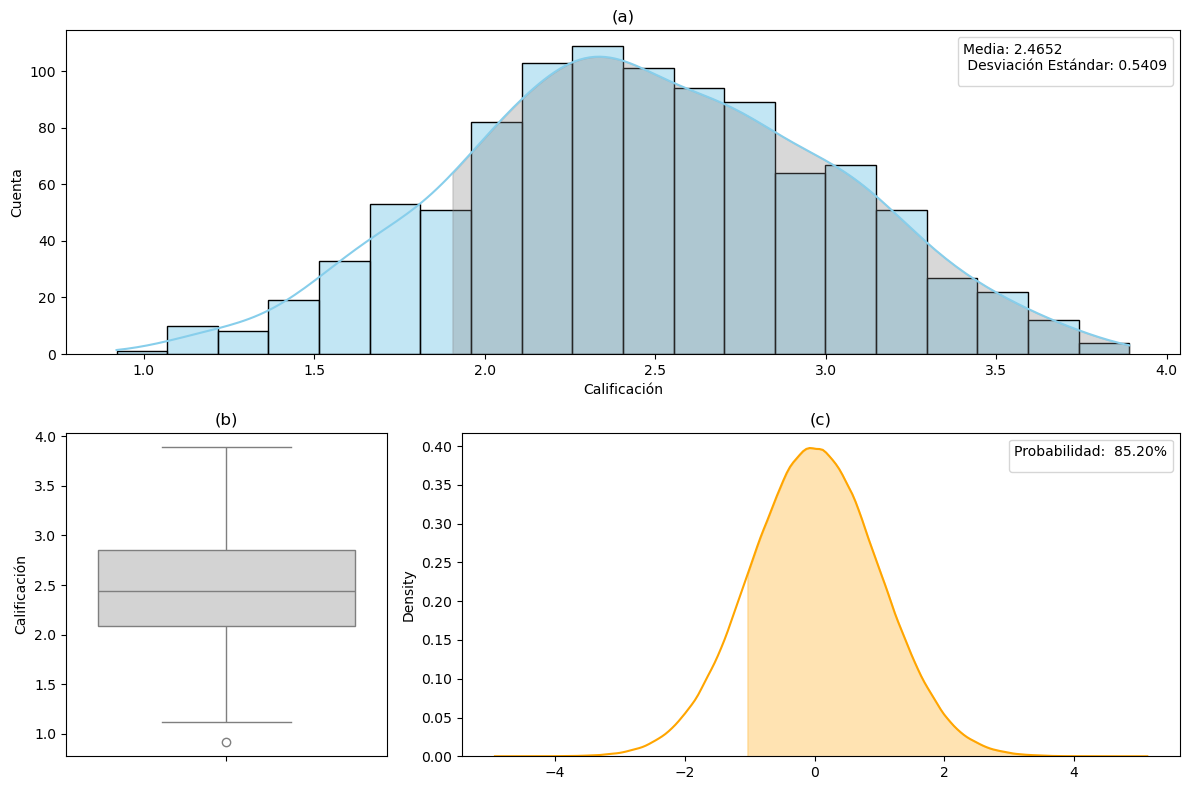

In [54]:
get_figures(banana['Calificación'], nombre='3_Calificacion_banana', rango=[1.9,'inf'])

## Indice de madurez - experimento 4

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


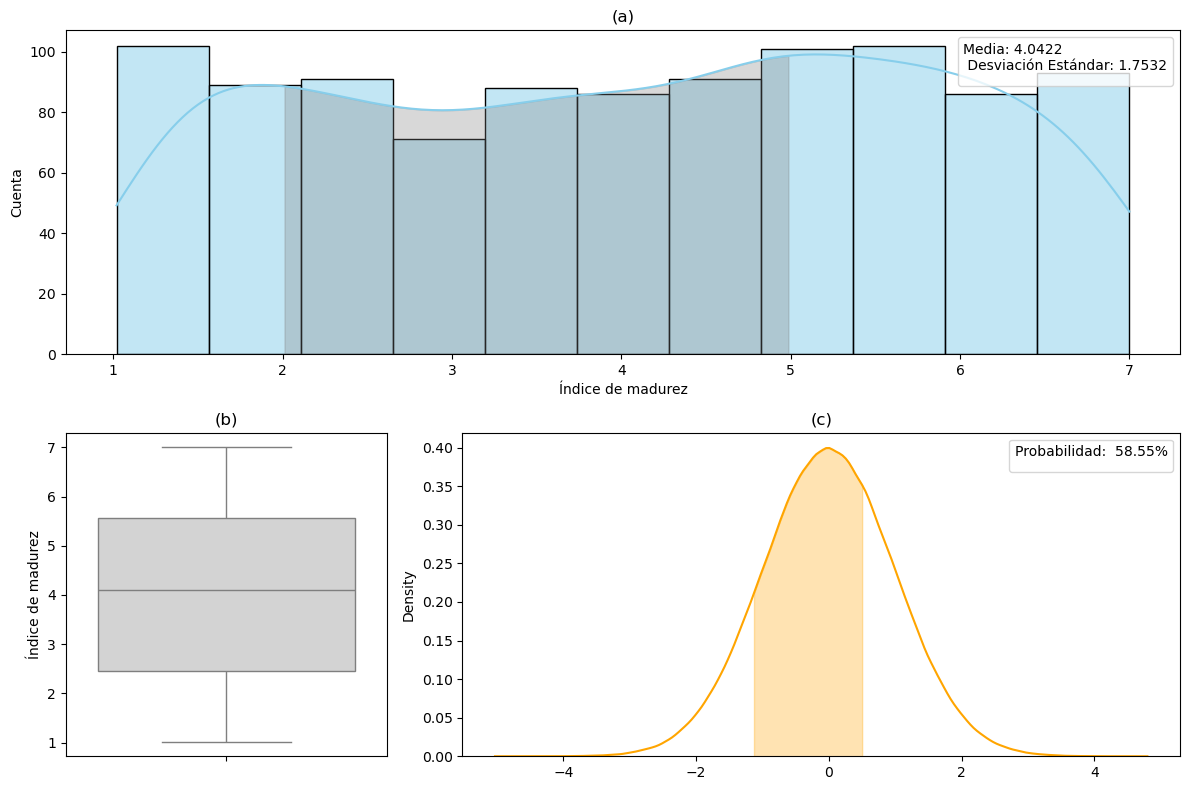

In [55]:
get_figures(banana['Índice de madurez'], nombre='4_Indice_madurez_banana', rango=[2,5])

## Indice Briz de azucar - experimento 5

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


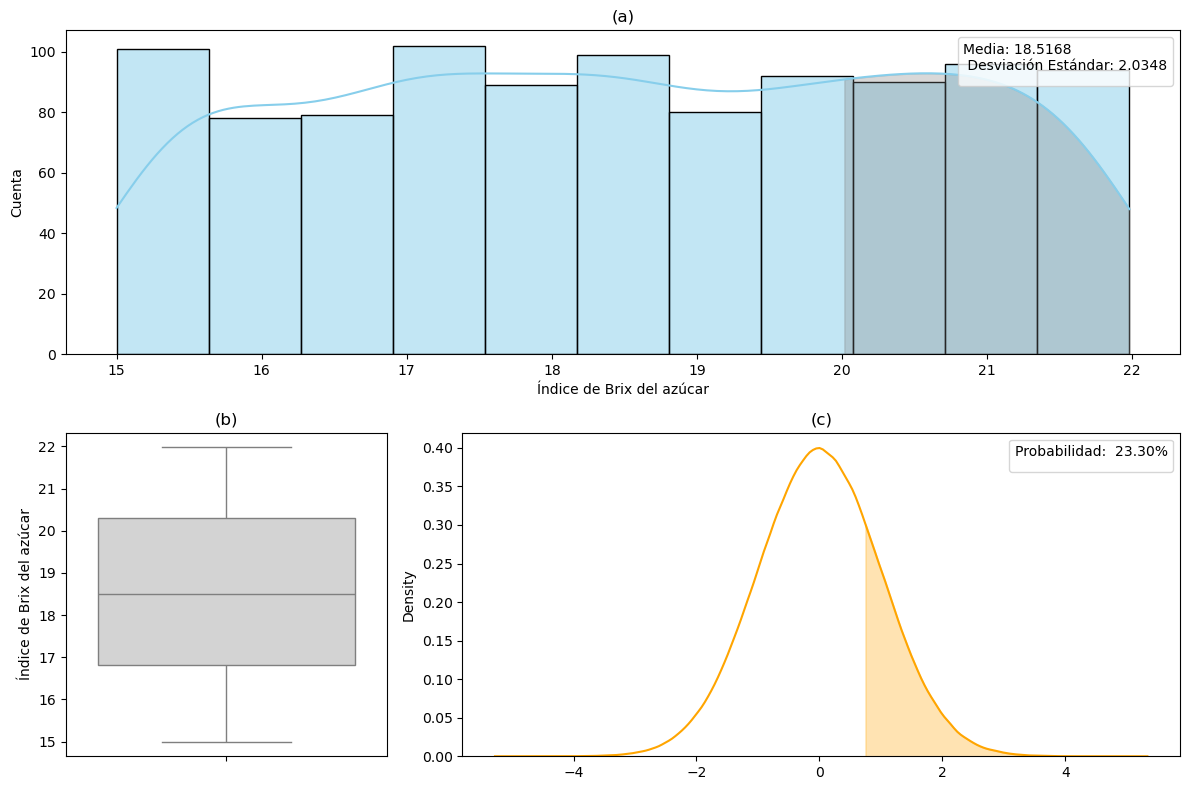

In [56]:
get_figures(banana['Índice de Brix del azúcar'], nombre = '5_Indice_azucar_banana', rango=[20, 'inf'])

## Peso banana - experimento 6

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


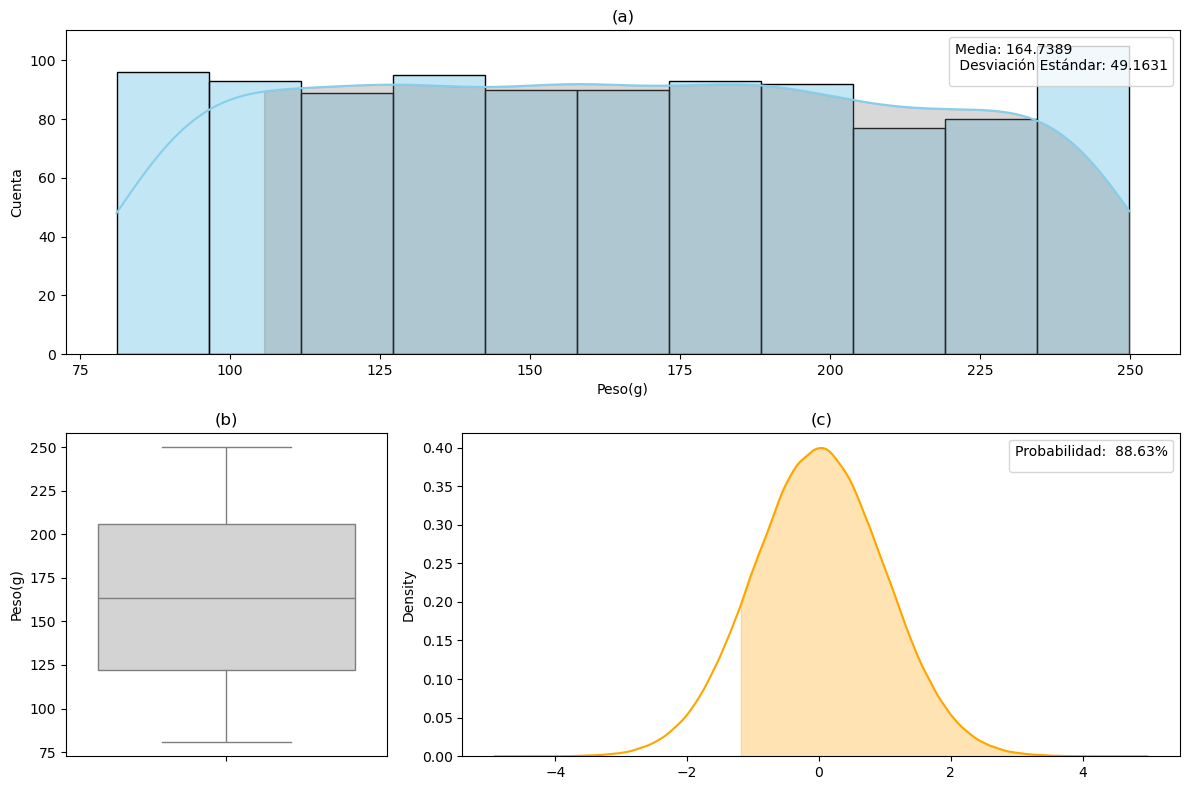

In [57]:
get_figures(banana['Peso(g)'], nombre = '6_Peso_banana', rango=[105.39, 'inf'])

## Edad arbol banana - experimento 7

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


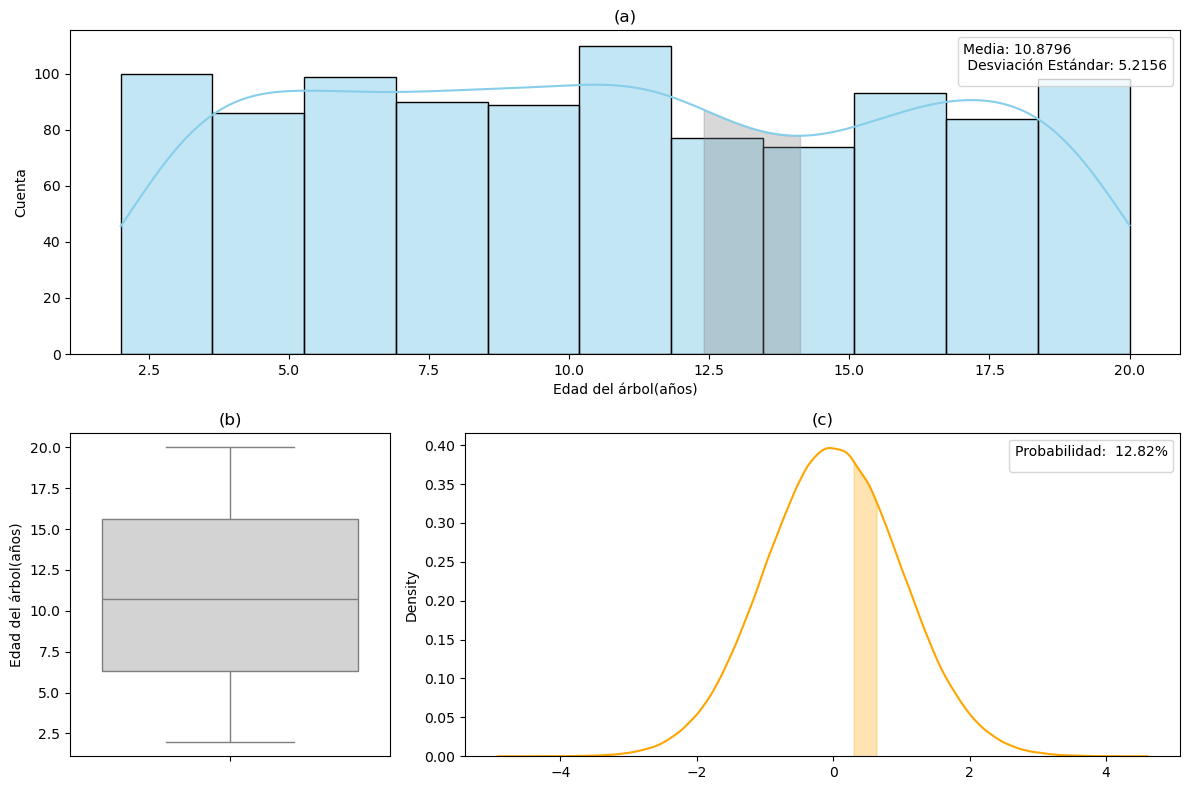

In [58]:
get_figures(banana['Edad del árbol(años)'], nombre = '7_Edad_arbol_banana', rango=[12.34,14.21])

## Altitud banana - experimento 8

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


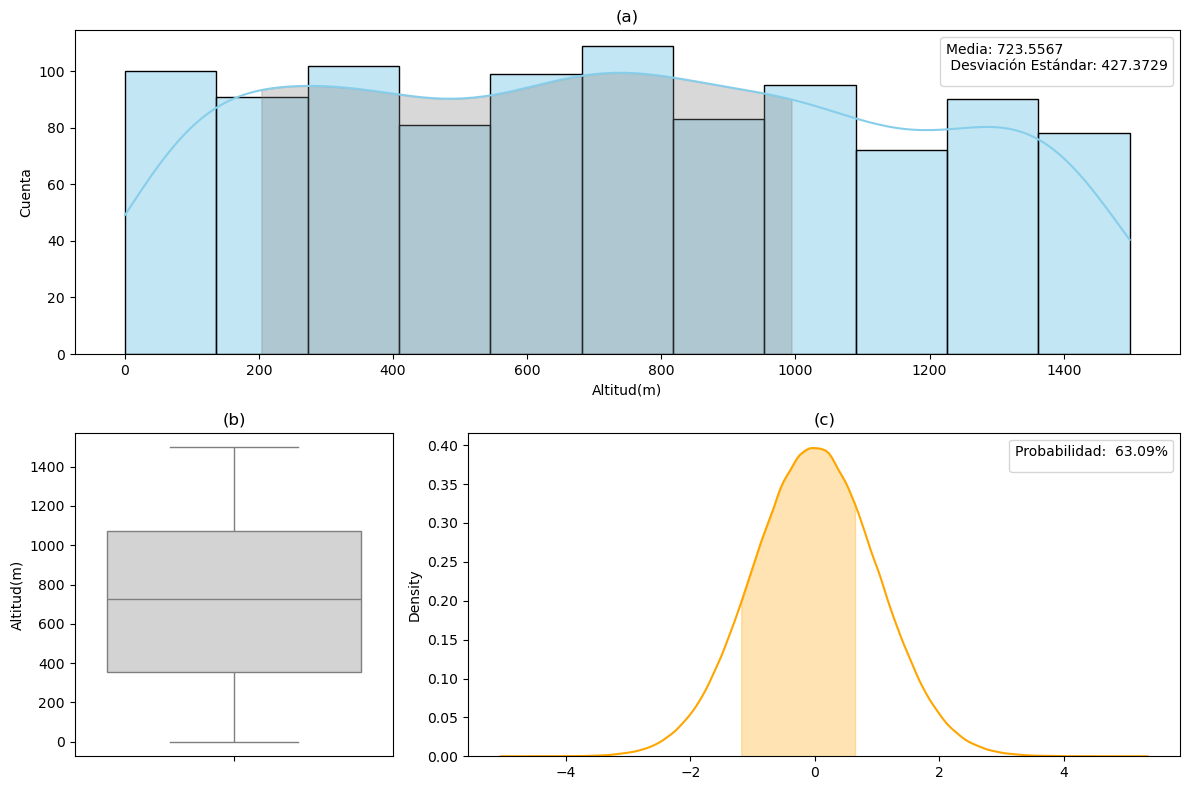

In [59]:
get_figures(banana['Altitud(m)'], nombre = '8_Altitud_banana', rango=[200, 1000])

## Lluvia banana - experimento 9

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


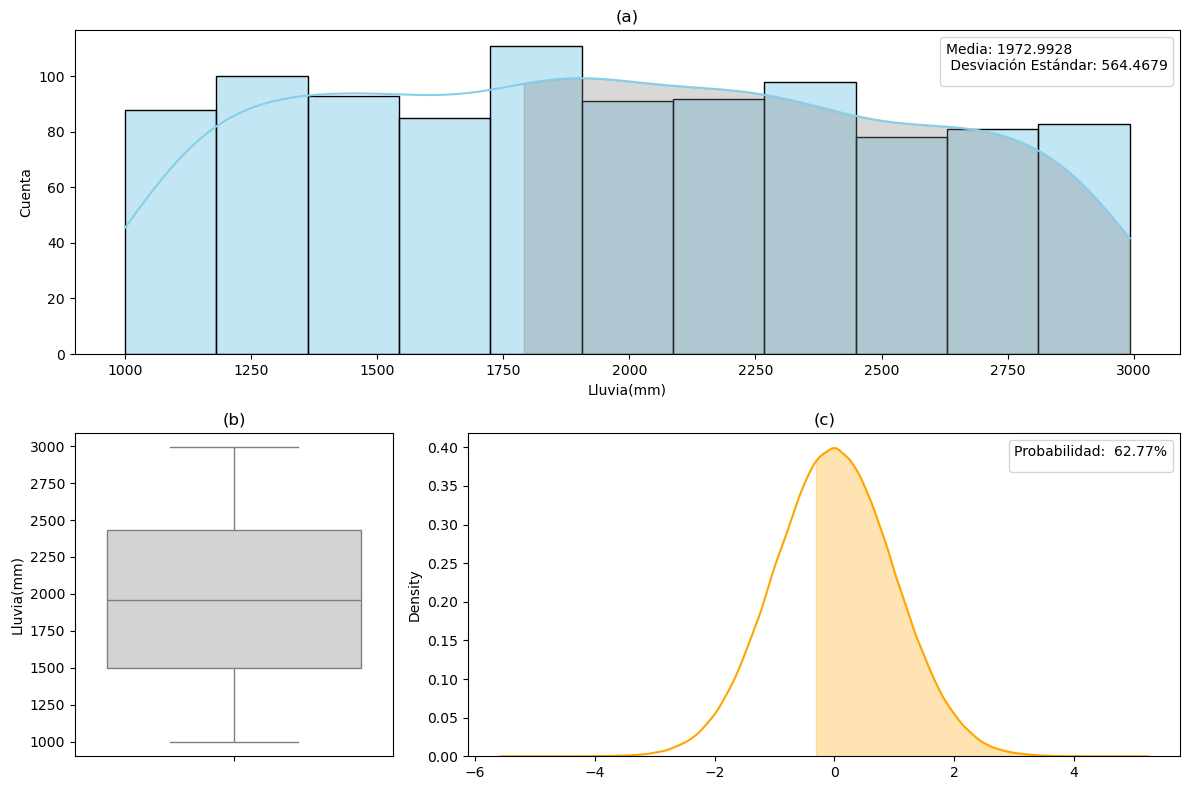

In [60]:
get_figures(banana['Lluvia(mm)'], nombre = '9_Lluvia_banana', rango=[1789.12, 'inf'])

## Nitrogeno en suelo - experimento 10

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


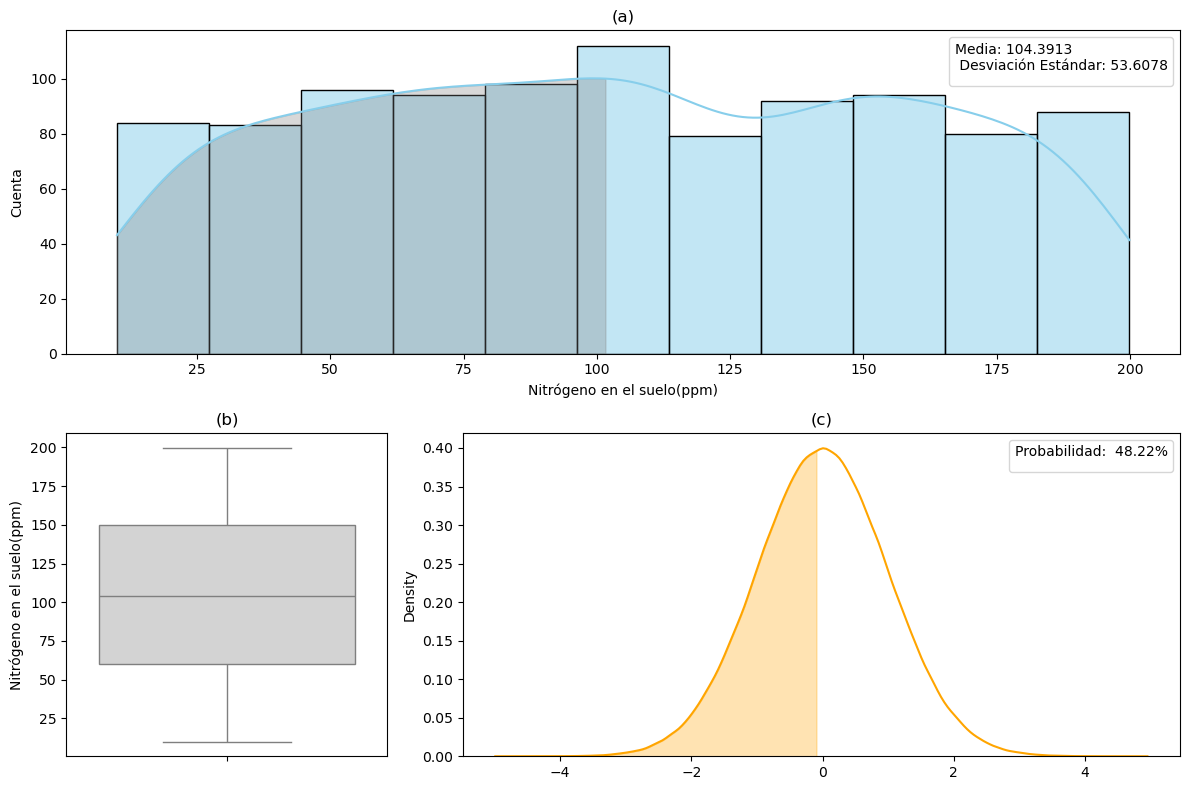

In [61]:
get_figures(banana['Nitrógeno en el suelo(ppm)'], nombre = '10_Nitrogeno_banana', rango=['inf', 102])

## Firmeza banana - expermento 11

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


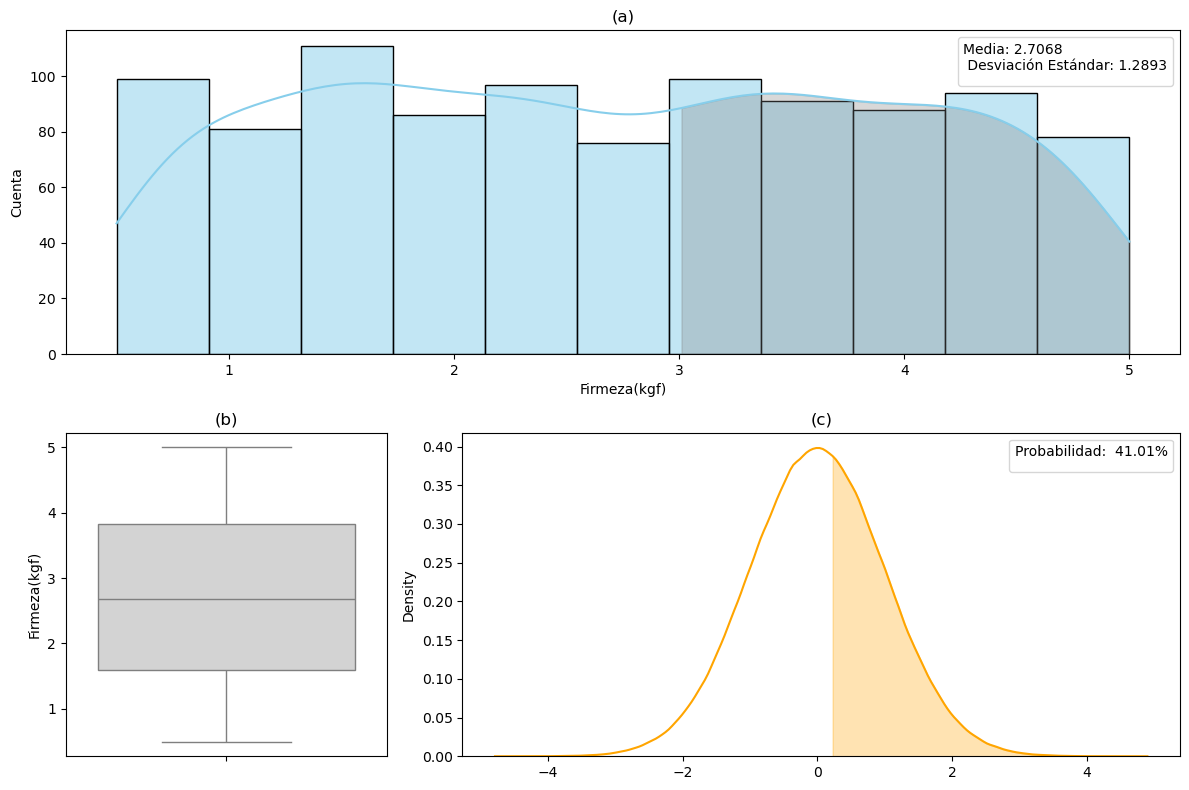

In [62]:
get_figures(banana['Firmeza(kgf)'], nombre = '6_firmeza_banana', rango=[3, 'inf'])

# Tortilla prices

In [63]:
nombre = 'tortilla_prices'
tortilla = pd.read_csv(path_datasets + nombre +'.csv')
tortilla.dropna(inplace = True)
tortilla.rename(columns={'Price per kilogram':'Precio por kg de tortillas'}, inplace=True)
tortilla = tortilla[(tortilla != 0).all(axis=1)]

print(tortilla['Precio por kg de tortillas'].min())
tortilla

3.87


,State,City,Year,Month,Day,Store type,Precio por kg de tortillas
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.90
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.00
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.00
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.00
5,Coahuila,Piedras Negras,2007,1,10,Mom and Pop Store,10.00
...,...,...,...,...,...,...,...
289141,Veracruz,Coatzacoalcos,2024,10,21,Big Retail Store,12.57
289142,Veracruz,Veracruz,2024,10,21,Big Retail Store,13.27
289143,Veracruz,Xalapa,2024,10,21,Big Retail Store,13.73
289144,Yucatán,Mérida,2024,10,21,Big Retail Store,13.13


## Precio tortilla - experimento 12

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


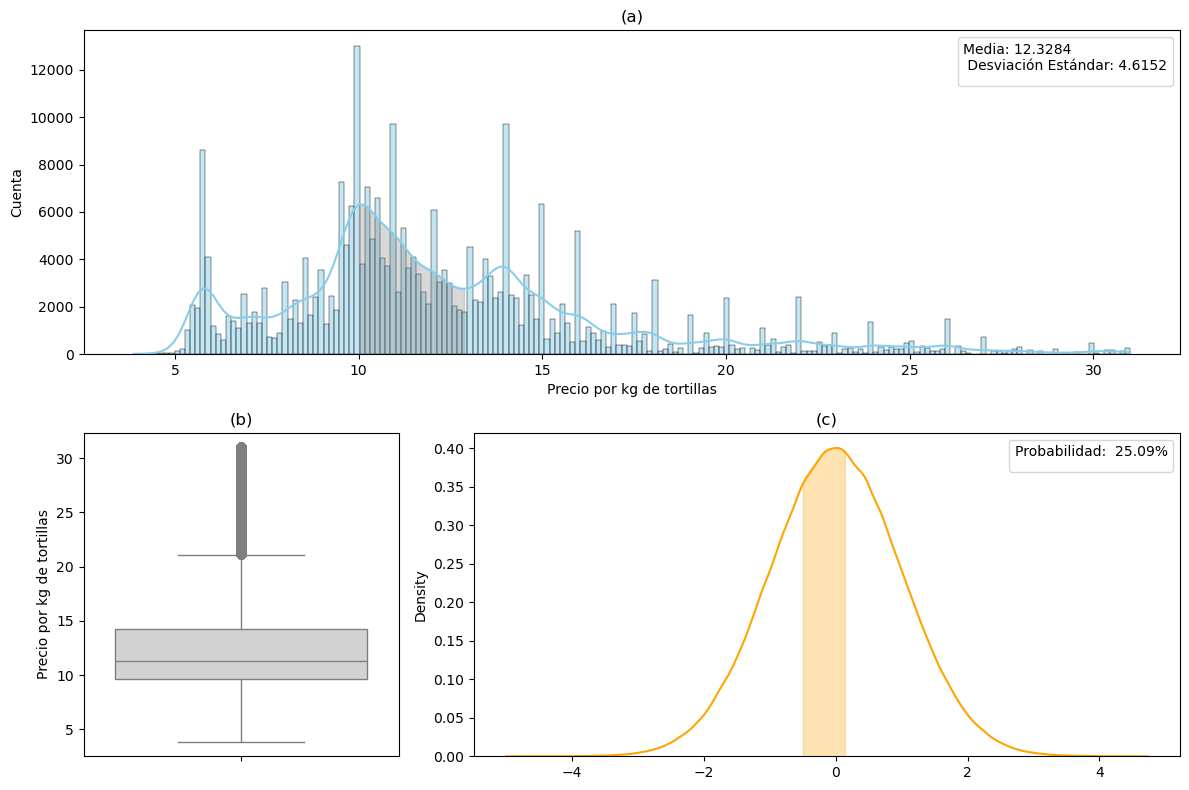

In [64]:
get_figures(tortilla['Precio por kg de tortillas'], nombre = '12_precio_tortilla', rango=[10,13])

# Food and nutrition

In [65]:
nombre = 'Food_and_Nutrition'
food_nutrition = pd.read_csv(path_datasets + nombre +'.csv')
food_nutrition.drop(columns=['Ages',
                     'Gender',
                     'Dietary Preference',
                     'Activity Level',
                     'Breakfast Suggestion',
                     'Lunch Suggestion',
                     'Dinner Suggestion',
                     'Snack Suggestion',
                     'Disease',
                     'Weight',
                     'Height',
                     'Daily Calorie Target'], inplace = True)

food_nutrition.rename(columns={'Protein':'Proteínas(g)',
                       'Sugar': 'Azúcar(g)',
                       'Sodium':'Sodio(mg)',
                       'Calories': 'Calorías',
                       'Carbohydrates': 'Carbohidratos(g)',
                       'Fiber':'Fibra(g)',
                       'Fat':'Grasa(g)'}, inplace = True)

food_nutrition

,Proteínas(g),Azúcar(g),Sodio(mg),Calorías,Carbohidratos(g),Fibra(g),Grasa(g)
0,120,125.0,24.0,2020,250,30.00,60
1,80,100.0,16.0,1480,200,24.00,40
2,100,150.0,20.0,2185,300,36.00,65
3,140,175.0,28.0,2680,350,42.00,80
4,80,125.0,16.0,1815,250,30.00,55
...,...,...,...,...,...,...,...
1693,94,63.0,18.8,1258,126,15.12,42
1694,158,105.0,31.6,2102,210,25.20,70
1695,191,127.5,38.2,2549,255,30.60,85
1696,249,166.0,49.8,3314,332,39.84,110


## Azucar food - experimento 13

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


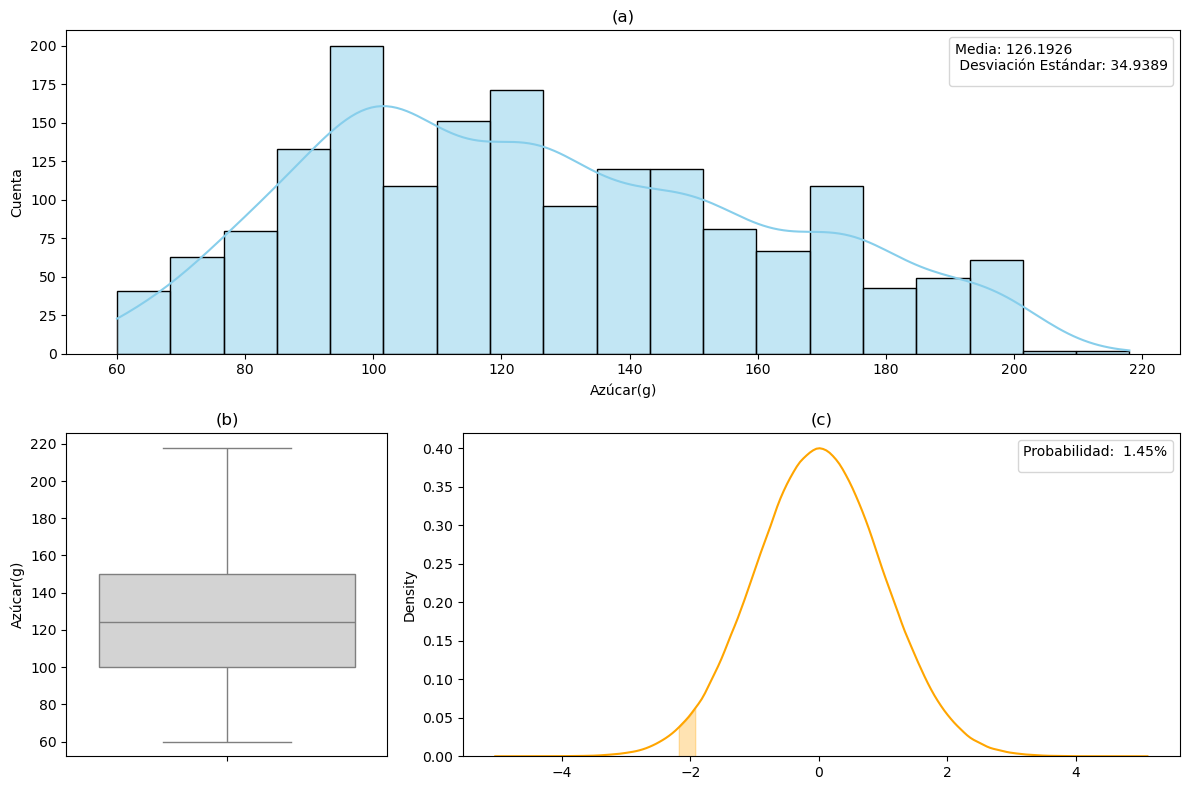

In [66]:
get_figures(food_nutrition['Azúcar(g)'], nombre='13_azucar_nutricion', rango=[50,60])

## Calorias food - experimento 14

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


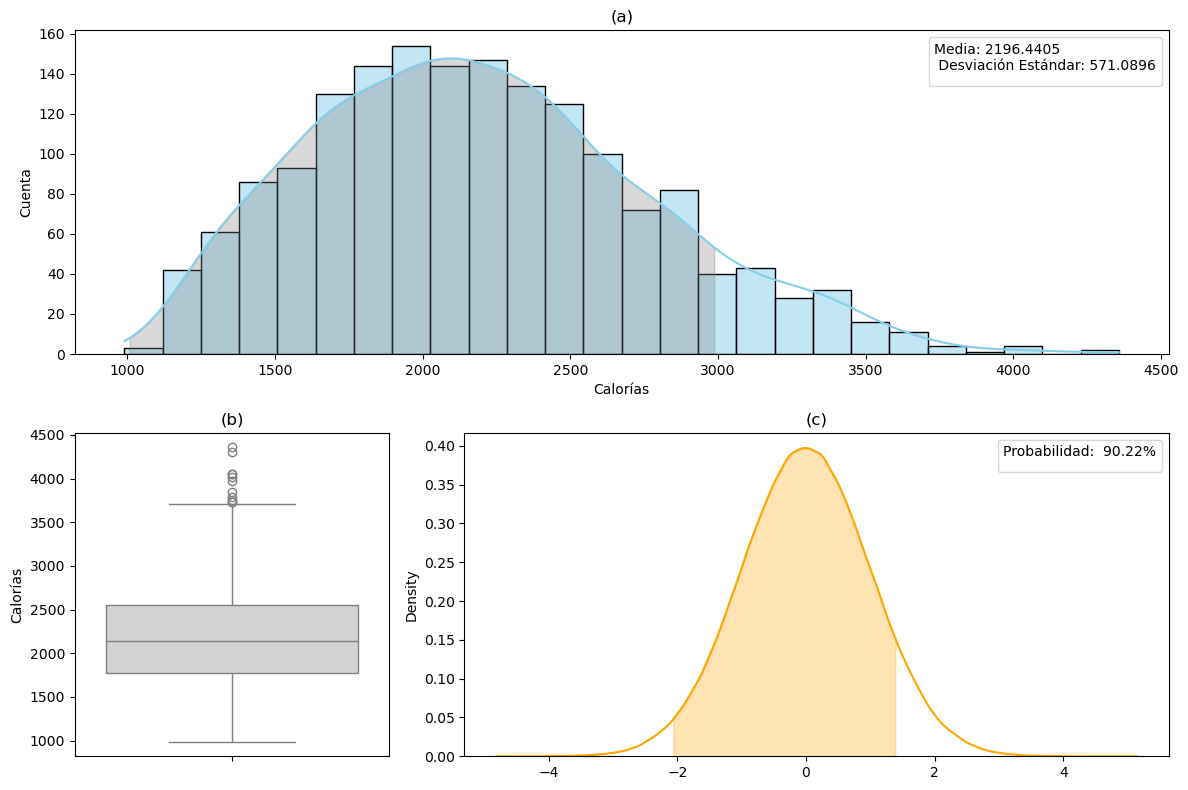

In [67]:
get_figures(food_nutrition['Calorías'], nombre='14_calorias_nutricion', rango=[1000,3000])

## Carbogidratos food - experimento 15

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


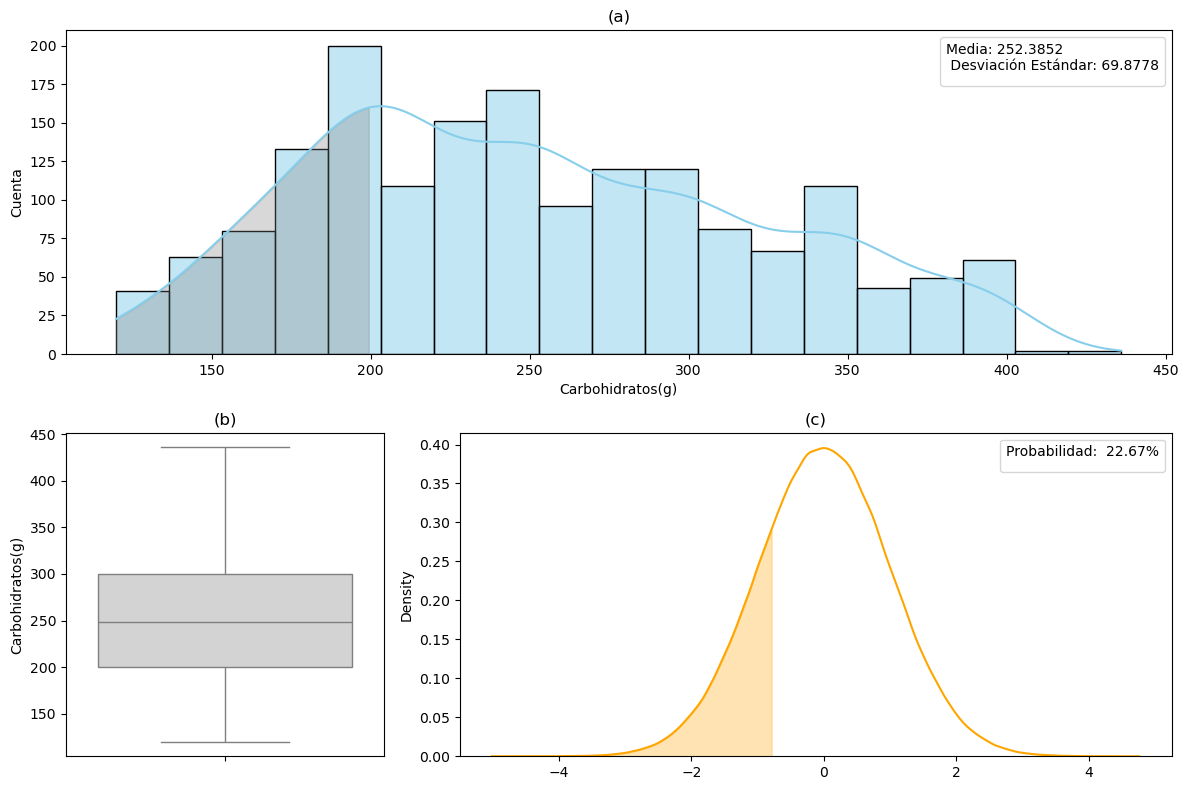

In [68]:
get_figures(food_nutrition['Carbohidratos(g)'], nombre='15_carbohidratos_nutricion', rango=['inf', 200])

## Fibra food -experimento 16

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


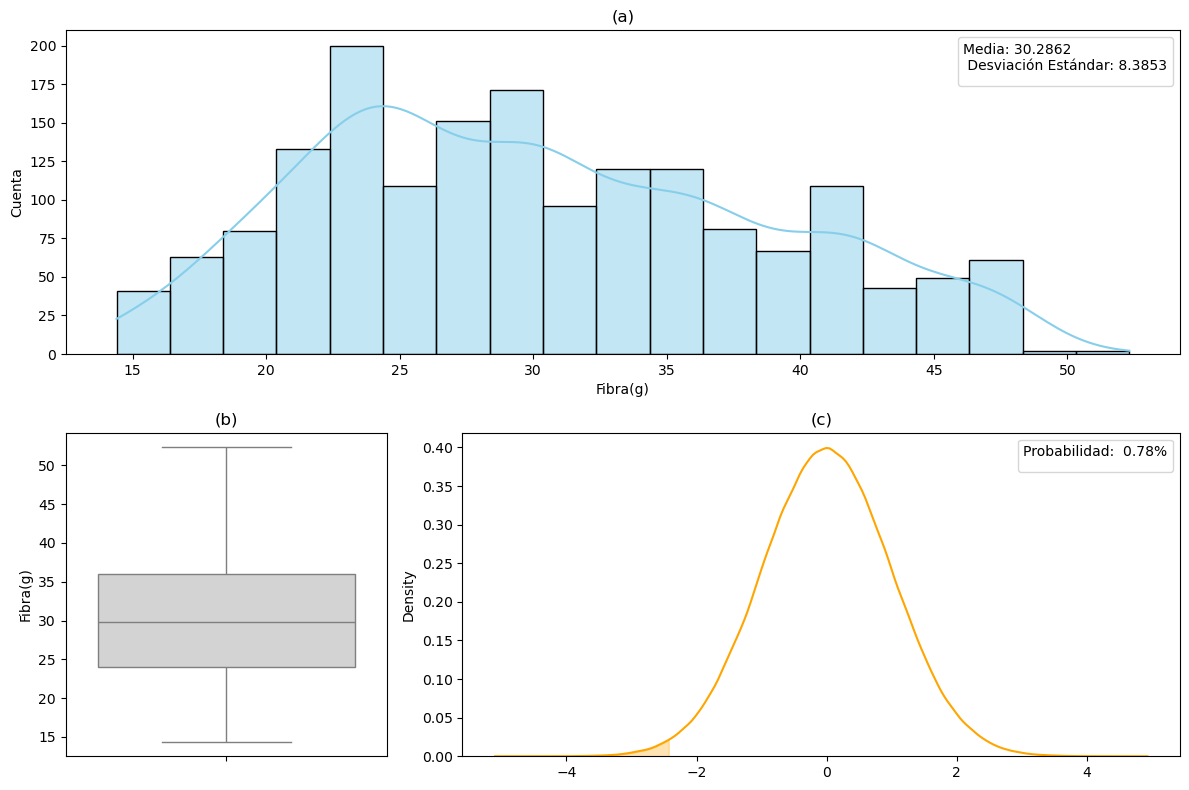

In [69]:
get_figures(food_nutrition['Fibra(g)'], nombre='16_fibra_nutricion', rango=['inf', 10])

## Grasa food -experimento 17

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


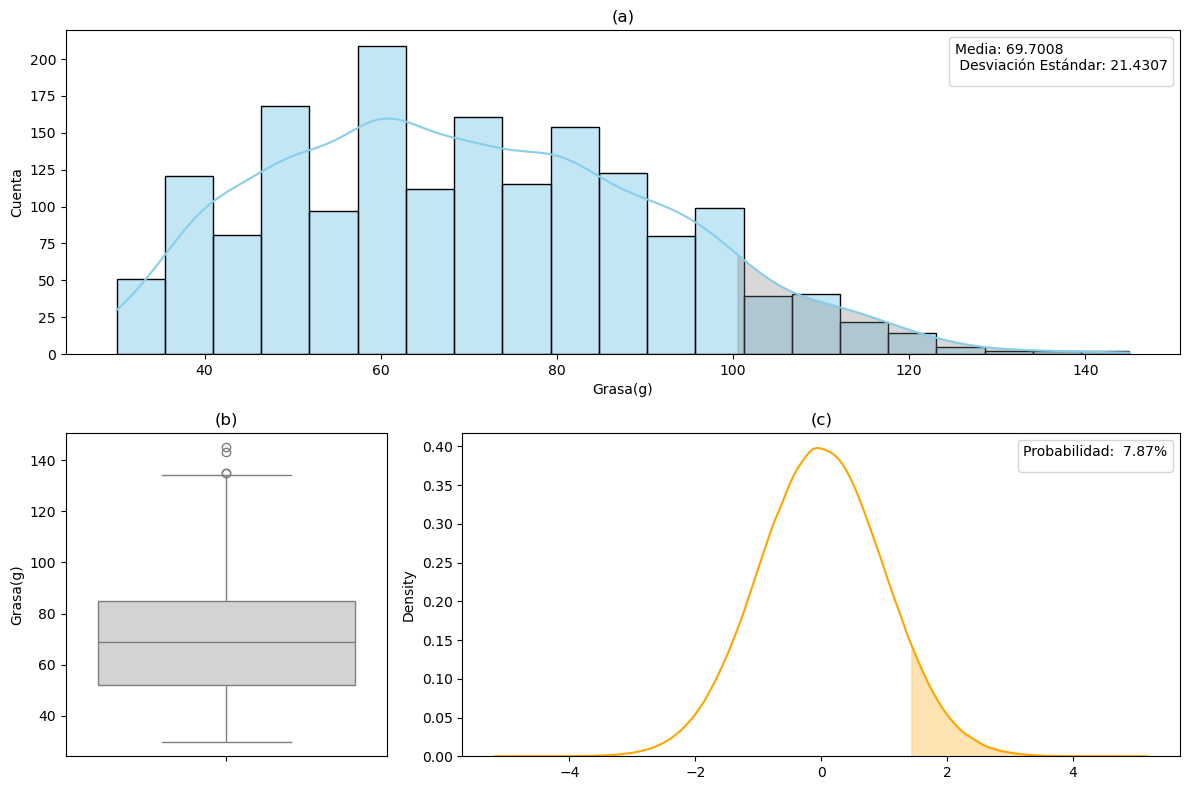

In [70]:
get_figures(food_nutrition['Grasa(g)'], nombre='17_grasa_nutricion', rango=[100, 'inf'])

## Proteinas food - experimento 18

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


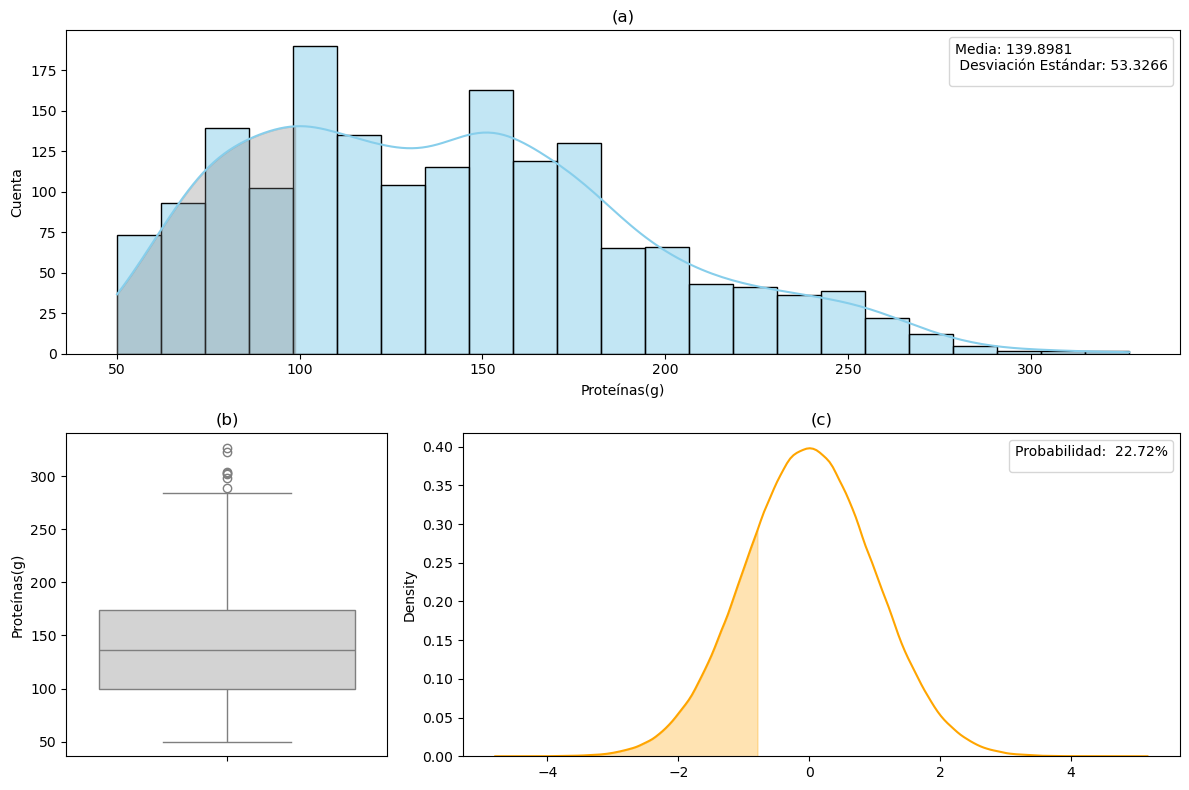

In [71]:
get_figures(food_nutrition['Proteínas(g)'], nombre='18_proteinas_nutricion', rango=['inf', 100])

## Sodio food - experimento 19

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


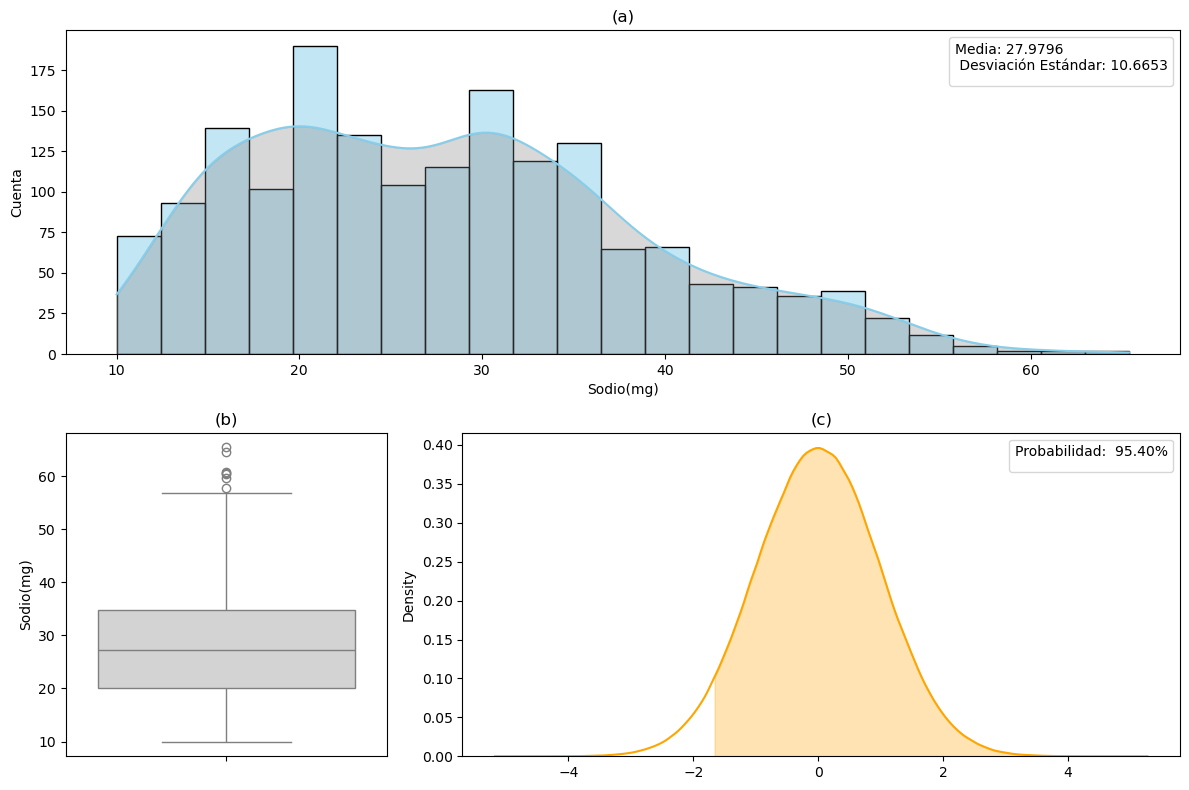

In [72]:
get_figures(food_nutrition['Sodio(mg)'], nombre='19_sodio_nutricion', rango=[10, 70])

# Plant health

In [73]:
nombre = 'plant_health'
plant = pd.read_csv(path_datasets + nombre + '.csv')
plant.rename(columns={'Electrochemical_Signal':'Señal electroquímica'}, inplace = True)
plant

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Señal electroquímica,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


## Senal electroquimica - experimento 20

/tmp/ipykernel_60072/3424761974.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=f'Media: {media:.4f} \n Desviación Estándar: {std:.4f}', loc='upper right')
/tmp/ipykernel_60072/3424761974.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = f'Probabilidad: {prob * 100: 0.2f}%')


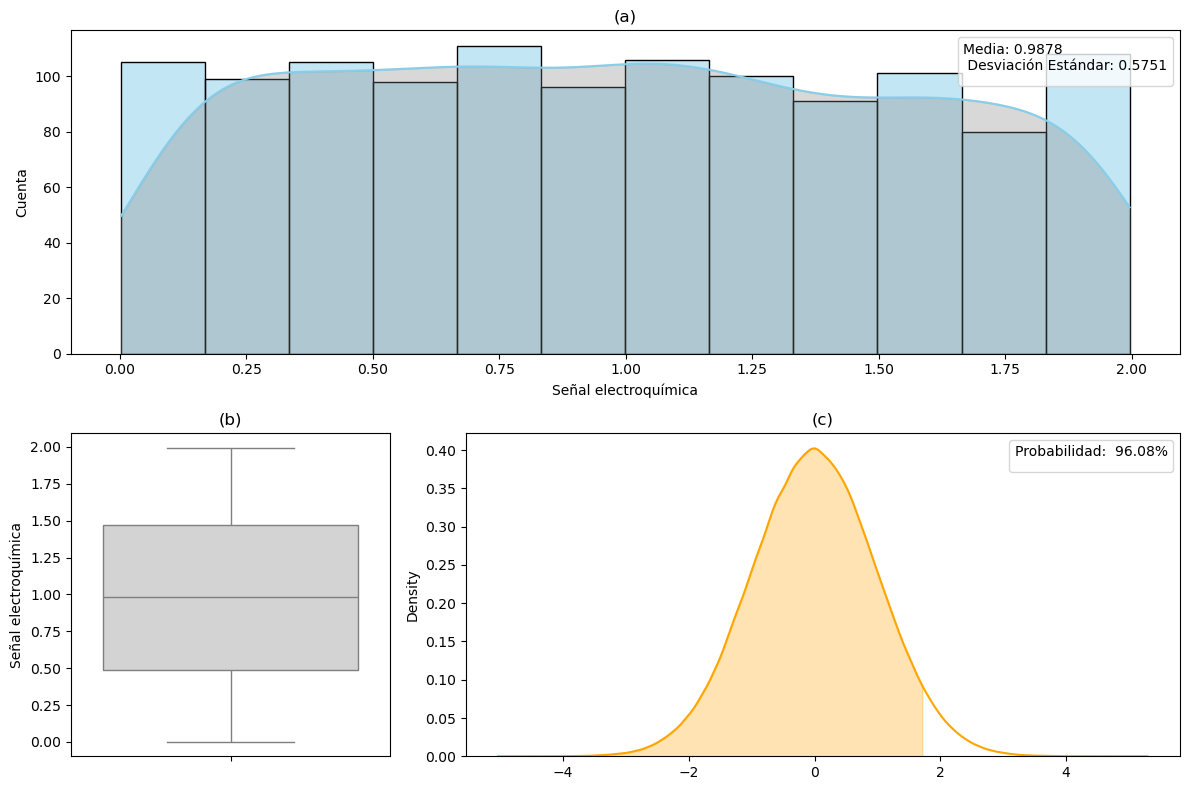

In [74]:
get_figures(plant['Señal electroquímica'], nombre='20_senal_planta', rango=['inf', 2])

# User behavior

In [75]:
nombre = 'user_behavior'

In [76]:
user_behavior = pd.read_csv(path_datasets + nombre +'.csv')
user_behavior

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


# Water quality

In [77]:
nombre = 'water_quality'

In [78]:
water = pd.read_csv(path_datasets + nombre + '.csv')
water


,Geographical Location (Latitude),Geographical Location (Longitude),Sampling Date,Nitrogen (mg/L),Phosphorus (mg/L),State of Sewage System
0,5.201086,-55.029673,2022-06-10,7.181860,2.320506,Good
1,-64.196408,94.483268,2018-10-12,9.735685,1.015308,Good
2,-7.892940,-90.503109,2023-02-16,6.778074,4.718452,Good
3,-11.334248,110.778986,2021-10-17,3.340601,3.315705,Moderate
4,-24.532061,-147.588402,2021-12-01,8.753211,4.682091,Good
...,...,...,...,...,...,...
40075,32.173429,121.459362,2017-03-11,6.765070,0.692772,Moderate
40076,-44.355125,-35.739953,2015-05-16,6.955335,2.917616,Moderate
40077,-82.957382,177.979361,2020-08-30,8.714242,1.683240,Poor
40078,-17.483532,25.092800,2018-12-13,0.739058,0.225967,Good
